In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
np.random.seed(42)


In [12]:
data = pd.read_csv(r"C:\Users\rahul\Desktop\projects\Mall_Customers.csv")

print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Info:")
print(data.info())
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

First 5 rows of the dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


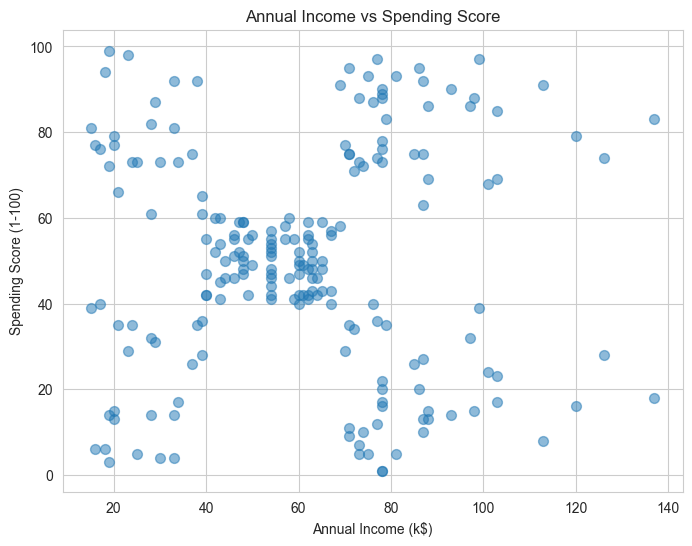


Summary Statistics:
       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


In [13]:
# Scatter plot of the selected features
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], s=50, alpha=0.5)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Summary statistics
print("\nSummary Statistics:")
print(X.describe())

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for convenience
X_scaled = pd.DataFrame(X_scaled, columns=['Annual Income', 'Spending Score'])
print("First 5 rows of scaled data:")
print(X_scaled.head())

First 5 rows of scaled data:
   Annual Income  Spending Score
0      -1.738999       -0.434801
1      -1.738999        1.195704
2      -1.700830       -1.715913
3      -1.700830        1.040418
4      -1.662660       -0.395980


In [44]:
dbscan = DBSCAN(eps=0.55, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

data['Cluster'] = clusters

# Number of clusters (excluding noise, labeled as -1)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters: 1
Number of noise points: 7


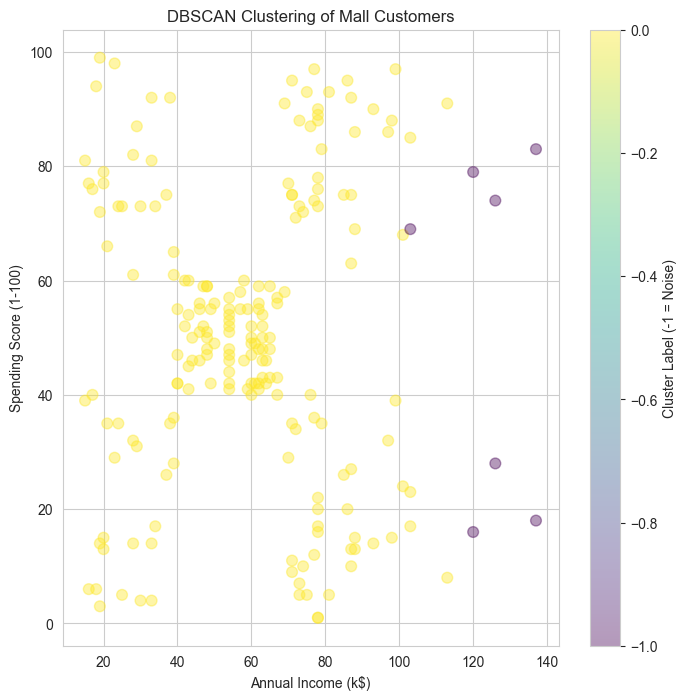

In [45]:
# Scatter plot
plt.figure(figsize=(8, 8))
scatter = plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], 
                      c=clusters, cmap='viridis', s=60, alpha=0.4)
plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(scatter, label='Cluster Label (-1 = Noise)')
plt.show()

In [35]:
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Silhouette score cannot be calculated (too few clusters or all noise).")

Silhouette Score: 0.426
